In [1]:
import numpy as np
import matplotlib.pyplot as plt    

In [2]:
def update(P, C, x_hat, obs):
    n = P.shape[0] #次元
    alpha = 10 ** -3 + 1
    beta = 2
    lmd = (alpha ** 2 - 1) * n
    wei0 = lmd / (n + lmd) + 1 - alpha ** 2 + beta
    wei = 0.5 / (n + lmd)
    L = np.linalg.cholesky(P * (n + lmd))

    sample_x0 = x_hat
    y_hat = sample_y0 = C * x_hat
    sample_x = []
    sample_y = []

    for i in range(n): #sample_xの作成
        sample_x.append(x_hat + L[:, i])
        sample_x.append(x_hat - L[:, i])
    
    for vec in sample_x: #実際に変換してみた
        sample_y.append(C * vec)

    diff_x = sample_x0 - x_hat
    diff_y = sample_y0 - y_hat
    P_xy = wei0 * diff_x * diff_y.T
    P_yy = wei0 * diff_y * diff_y.T + R

    for i in range(2 * n): #共分散行列の計算
        diff_x = sample_x[i] - x_hat
        diff_y = sample_y[i] - y_hat
        P_xy += wei * diff_x * diff_y.T
        P_yy += wei * diff_y * diff_y.T

    #更新
    G = P_xy * np.linalg.inv(P_yy)
    x_hat = x_hat + G * (obs - y_hat)
    P = P - G * P_xy.T
    
    return P, x_hat

[[ 7.76188667]
 [ 7.77063927]
 [ 0.6579246 ]]
[[  7.09624493e-04   4.89890942e-05   5.28386523e-05]
 [  4.89890942e-05   6.50744298e-04   1.17454521e-04]
 [  5.28386523e-05   1.17454521e-04   5.47382702e-03]]


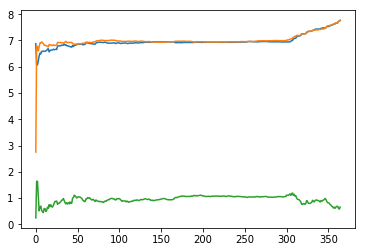

In [20]:
a = 7.
b = 7.
c = 1.



x = np.random.uniform(-5, 5, 365)
x2 = np.random.uniform(-5, 5, 365)
v = np.random.normal(0, 2, 365)
y = []

a_hat = []
b_hat = []
c_hat = []


for i in range(365):
    if i < 300:
        y.append(a * x[i] + b * x2[i] + c + v[i])
    else:
        y.append((a + 4) * x[i] + (b + 4) * x2[i] + c + v[i])
        
P = np.mat(np.mat([[1,0,0],[0,1,0],[0,0,1]]))
R = np.mat([2])
I = np.mat(np.identity(3))
x_hat = np.mat([[1],[2],[-1]])
S =np.mat([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) * 0.1


for i in range(365):
    C = np.mat([x[i], x2[i], 1]) #変換行列
    obs = np.mat([y[i]]) #観測値
    if (i % 500 == 0): #刺激
        P = P + S ** 2
    P, x_hat = update(P, C, x_hat, obs)
    a_hat.append(x_hat[0,0])
    b_hat.append(x_hat[1,0])
    c_hat.append(x_hat[2,0])

print(x_hat)
print(P)
plt.plot(a_hat)
plt.plot(b_hat)
plt.plot(c_hat)
plt.show()